In [68]:
import astropy.io.fits as fits
import treecorr
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kl_div
data_dir = '/home/b7009348/WGL_project/DES-data/'

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
plt.rc('axes', unicode_minus=False)

In [4]:
with fits.open(data_dir+'y1_mcal_shapes_matched.fits') as hdu:
    data = hdu[1].data
    mcal_e1_m = data['e1']
    mcal_e2_m = data['e2']
    R = np.mean(data['R11'])
    
with fits.open(data_dir+'y1_mcal_flags=0.fits') as hdu:
    data = hdu[1].data
    mcal_e1 = data['e1']
    mcal_e2 = data['e2']
    Rn = np.mean(data['R11'])
    
del data

In [22]:
print(R, Rn)

0.7130433641769826 0.6406887664077636


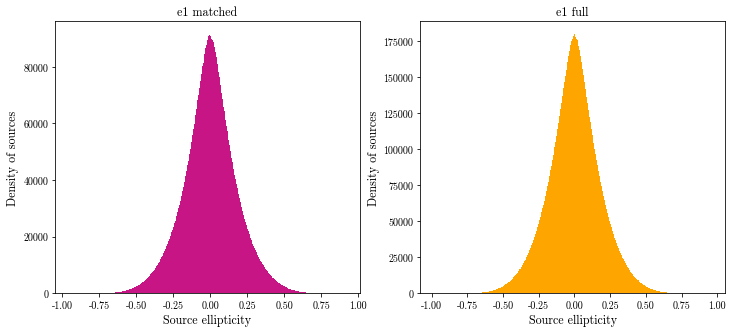

In [46]:
nbins = 1000

fig, axs = plt.subplots(1, 2, figsize=[12,5], sharey=False)

axs[0].hist(mcal_e1_m, bins=nbins, color='mediumvioletred')
axs[0].set_title('e1 matched', fontsize=12)
axs[0].set_ylabel('Density of sources', fontsize=12)
axs[0].set_xlabel('Source ellipticity', fontsize=12)

axs[1].hist(mcal_e1, bins=nbins, color='orange')
axs[1].set_title('e1 full', fontsize=12)
axs[1].set_ylabel('Density of sources', fontsize=12)
axs[1].set_xlabel('Source ellipticity', fontsize=12)

fig.savefig('mcal_ellipticity_dist.png', dpi=300)

In [99]:
match_counts, match_bins = np.histogram(mcal_e1_m, bins=1000)
full_counts, full_bins = np.histogram(mcal_e1, bins=1000)

#normalise to get probability dist.
match_pdf = match_counts / np.size(mcal_e1_m)
full_pdf = full_counts / np.size(mcal_e1)

In [111]:
print(full_pdf)

[5.74062403e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.87031201e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.87031201e-08 2.87031201e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.87031201e-08 2.87031201e-08 2.87031201e-08 0.00000000e+00
 0.00000000e+00 5.74062403e-08 0.00000000e+00 5.74062403e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.87031201e-08
 5.74062403e-08 0.00000000e+00 0.00000000e+00 5.74062403e-08
 0.00000000e+00 0.00000000e+00 2.87031201e-08 0.00000000e+00
 2.87031201e-08 8.61093604e-08 2.87031201e-08 2.87031201e-08
 5.74062403e-08 2.87031201e-08 2.87031201e-08 2.87031201e-08
 2.87031201e-08 1.43515601e-07 0.00000000e+00 8.61093604e-08
 1.14812481e-07 0.00000000e+00 0.00000000e+00 8.61093604e-08
 1.72218721e-07 1.14812481e-07 5.74062403e-08 5.74062403e-08
 8.61093604e-08 1.148124

In [116]:
def kl_divergence(p,q):
    kl_values = np.where(p != 0, p * np.log(p/q), 0)
    return np.sum(np.where(kl_values == np.inf, 0, kl_values))
    
kl_divergence(match_pdf, full_pdf)

<ipython-input-116-7236eeeb28d0>:2: RuntimeWarning: divide by zero encountered in true_divide
  kl_values = np.where(p != 0, p * np.log(p/q), 0)
<ipython-input-116-7236eeeb28d0>:2: RuntimeWarning: invalid value encountered in true_divide
  kl_values = np.where(p != 0, p * np.log(p/q), 0)
<ipython-input-116-7236eeeb28d0>:2: RuntimeWarning: divide by zero encountered in log
  kl_values = np.where(p != 0, p * np.log(p/q), 0)
<ipython-input-116-7236eeeb28d0>:2: RuntimeWarning: invalid value encountered in multiply
  kl_values = np.where(p != 0, p * np.log(p/q), 0)


0.001542008407316619

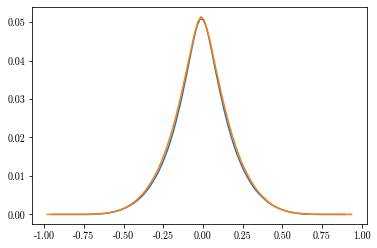

In [91]:
plt.plot(match_bins[:-1], match_pdf)
plt.plot(full_bins[:-1], full_pdf)